# 分析Z500上各个模型的性能

In [1]:
import sys
sys.path.append("../")
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from src.utils.plot import subplot_daloop
from src.utils.data_utils import NAME_TO_VAR

In [2]:
DALOOP_DIR = "../../results/da_loop"
ERA5_DIR = "../../data/era5"
BACKGRDOUND_DIR = "../../data/background"
VARIABLE = "geopotential"
LEVEL = 500
RESOLUTION = 5.625

In [3]:
gt = xr.open_mfdataset(f"{ERA5_DIR}/{VARIABLE}_{LEVEL}_{RESOLUTION}deg/test/*.nc", combine="by_coords")
xb = xr.open_mfdataset(f"{BACKGRDOUND_DIR}/{VARIABLE}_{LEVEL}_{RESOLUTION}deg/test/*.nc", combine="by_coords")

## 绘制同化预报循环误差

In [6]:
rmse_4dvarcyclegan_scalein_obs20 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.2/rmse_4dvarcyclegan_scalein_obspartial0.2.nc", combine="by_coords")
rmse_4dvarcyclegan_obs20 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.2/rmse_4dvarcyclegan_wscale_obspartial0.2.nc", combine="by_coords")

acc_4dvarcyclegan_scalein_obs20 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.2/acc_4dvarcyclegan_scalein_obspartial0.2.nc", combine="by_coords")
acc_4dvarcyclegan_obs20 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.2/acc_4dvarcyclegan_wscale_obspartial0.2.nc", combine="by_coords")

mae_4dvarcyclegan_scalein_obs20 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.2/mae_4dvarcyclegan_scalein_obspartial0.2.nc", combine="by_coords")
mae_4dvarcyclegan_obs20 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.2/mae_4dvarcyclegan_wscale_obspartial0.2.nc", combine="by_coords")

In [7]:
rmse_4dvarcyclegan_scalein_obs15 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.15/rmse_4dvarcyclegan_scalein_obspartial0.15.nc", combine="by_coords")
rmse_4dvarcyclegan_obs15 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.15/rmse_4dvarcyclegan_wscale_obspartial0.15.nc", combine="by_coords")

acc_4dvarcyclegan_scalein_obs15 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.15/acc_4dvarcyclegan_scalein_obspartial0.15.nc", combine="by_coords")
acc_4dvarcyclegan_obs15 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.15/acc_4dvarcyclegan_wscale_obspartial0.15.nc", combine="by_coords")

mae_4dvarcyclegan_scalein_obs15 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.15/mae_4dvarcyclegan_scalein_obspartial0.15.nc", combine="by_coords")
mae_4dvarcyclegan_obs15 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.15/mae_4dvarcyclegan_wscale_obspartial0.15.nc", combine="by_coords")

In [8]:
rmse_4dvarcyclegan_scalein_obs10 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.1/rmse_4dvarcyclegan_scalein_obspartial0.1.nc", combine="by_coords")
rmse_4dvarcyclegan_obs10 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.1/rmse_4dvarcyclegan_wscale_obspartial0.1.nc", combine="by_coords")

acc_4dvarcyclegan_scalein_obs10 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.1/acc_4dvarcyclegan_scalein_obspartial0.1.nc", combine="by_coords")
acc_4dvarcyclegan_obs10 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.1/acc_4dvarcyclegan_wscale_obspartial0.1.nc", combine="by_coords")

mae_4dvarcyclegan_scalein_obs10 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.1/mae_4dvarcyclegan_scalein_obspartial0.1.nc", combine="by_coords")
mae_4dvarcyclegan_obs10 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.1/mae_4dvarcyclegan_wscale_obspartial0.1.nc", combine="by_coords")

In [9]:
rmse_4dvarcyclegan_scalein_obs5 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.05/rmse_4dvarcyclegan_scalein_obspartial0.05.nc", combine="by_coords")
rmse_4dvarcyclegan_obs5 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.05/rmse_4dvarcyclegan_wscale_obspartial0.05.nc", combine="by_coords")

acc_4dvarcyclegan_scalein_obs5 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.05/acc_4dvarcyclegan_scalein_obspartial0.05.nc", combine="by_coords")
acc_4dvarcyclegan_obs5 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.05/acc_4dvarcyclegan_wscale_obspartial0.05.nc", combine="by_coords")

mae_4dvarcyclegan_scalein_obs5 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.05/mae_4dvarcyclegan_scalein_obspartial0.05.nc", combine="by_coords")
mae_4dvarcyclegan_obs5 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.05/mae_4dvarcyclegan_wscale_obspartial0.05.nc", combine="by_coords")

In [10]:
rmse = {
    "CycleGAN Obs20": rmse_4dvarcyclegan_scalein_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVarGAN Obs20": rmse_4dvarcyclegan_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,

    "CycleGAN Obs15": rmse_4dvarcyclegan_scalein_obs15[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVarGAN Obs15": rmse_4dvarcyclegan_obs15[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,

    "CycleGAN Obs10": rmse_4dvarcyclegan_scalein_obs10[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVarGAN Obs10": rmse_4dvarcyclegan_obs10[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,

    "CycleGAN Obs5": rmse_4dvarcyclegan_scalein_obs5[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVarGAN Obs5": rmse_4dvarcyclegan_obs5[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
}

acc = {
    "CycleGAN Obs20": acc_4dvarcyclegan_scalein_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVarGAN Obs20": acc_4dvarcyclegan_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,

    "CycleGAN Obs15": acc_4dvarcyclegan_scalein_obs15[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVarGAN Obs15": acc_4dvarcyclegan_obs15[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,

    "CycleGAN Obs10": acc_4dvarcyclegan_scalein_obs10[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVarGAN Obs10": acc_4dvarcyclegan_obs10[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,

    "CycleGAN Obs5": acc_4dvarcyclegan_scalein_obs5[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVarGAN Obs5": acc_4dvarcyclegan_obs5[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
}

mae = {
    "CycleGAN Obs20": mae_4dvarcyclegan_scalein_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVarGAN Obs20": mae_4dvarcyclegan_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,

    "CycleGAN Obs15": mae_4dvarcyclegan_scalein_obs15[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVarGAN Obs15": mae_4dvarcyclegan_obs15[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,

    "CycleGAN Obs10": mae_4dvarcyclegan_scalein_obs10[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVarGAN Obs10": mae_4dvarcyclegan_obs10[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,

    "CycleGAN Obs5": mae_4dvarcyclegan_scalein_obs5[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
    "4DVarGAN Obs5": mae_4dvarcyclegan_obs5[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].values,
}

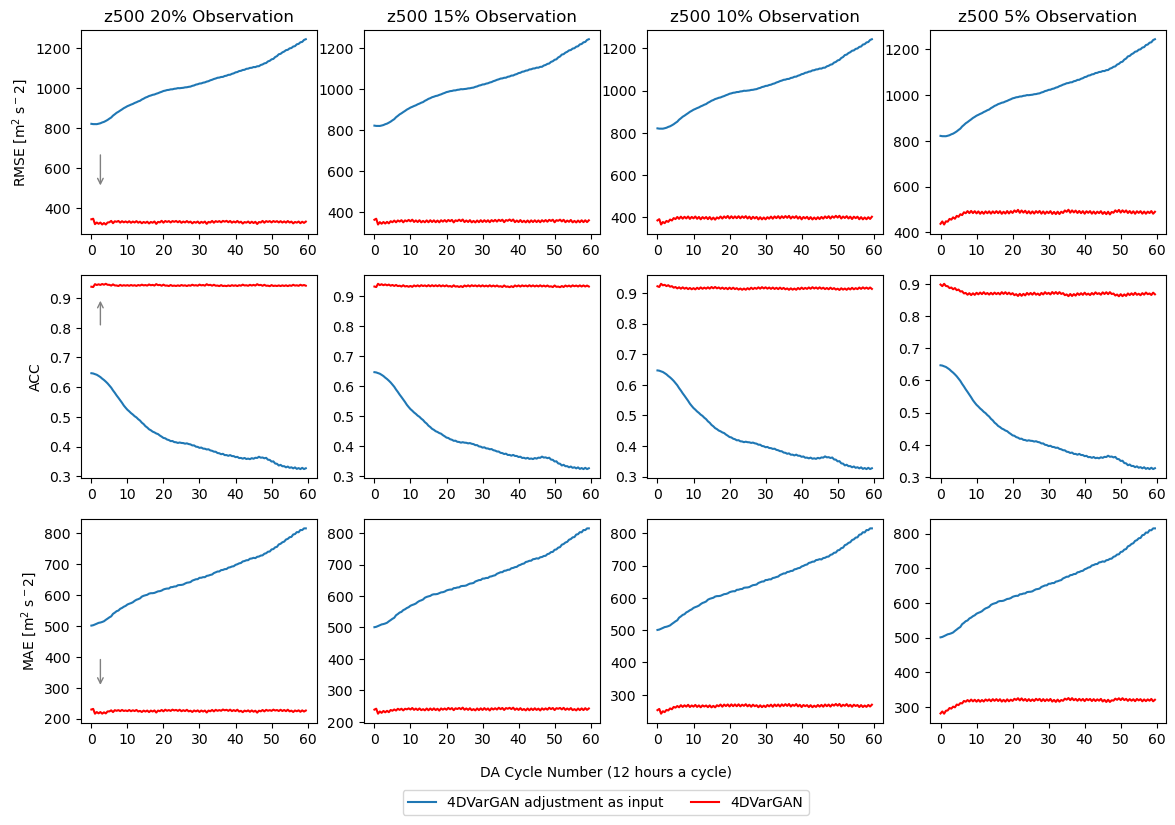

In [12]:
fig, axes = plt.subplots(3, 4, figsize=(14, 9))
axes[0,0].plot(rmse["CycleGAN Obs20"], label=f"4DVarGAN adjustment as input")
axes[0,0].plot(rmse["4DVarGAN Obs20"], label=f"4DVarGAN", color="red")
axes[0,1].plot(rmse["CycleGAN Obs15"], label=f"4DVarGAN adjustment as input")
axes[0,1].plot(rmse["4DVarGAN Obs15"], label=f"4DVarGAN", color="red")
axes[0,2].plot(rmse["CycleGAN Obs10"], label=f"4DVarGAN adjustment as input")
axes[0,2].plot(rmse["4DVarGAN Obs10"], label=f"4DVarGAN", color="red")
axes[0,3].plot(rmse["CycleGAN Obs5"], label=f"4DVarGAN adjustment as input")
axes[0,3].plot(rmse["4DVarGAN Obs5"], label=f"4DVarGAN", color="red")

axes[1,0].plot(acc["CycleGAN Obs20"], label=f"4DVarGAN adjustment as input")
axes[1,0].plot(acc["4DVarGAN Obs20"], label=f"4DVarGAN", color="red")
axes[1,1].plot(acc["CycleGAN Obs15"], label=f"4DVarGAN adjustment as input")
axes[1,1].plot(acc["4DVarGAN Obs15"], label=f"4DVarGAN", color="red")
axes[1,2].plot(acc["CycleGAN Obs10"], label=f"4DVarGAN adjustment as input")
axes[1,2].plot(acc["4DVarGAN Obs10"], label=f"4DVarGAN", color="red")
axes[1,3].plot(acc["CycleGAN Obs5"], label=f"4DVarGAN adjustment as input")
axes[1,3].plot(acc["4DVarGAN Obs5"], label=f"4DVarGAN", color="red")

axes[2,0].plot(mae["CycleGAN Obs20"], label=f"4DVarGAN adjustment as input")
axes[2,0].plot(mae["4DVarGAN Obs20"], label=f"4DVarGAN", color="red")
axes[2,1].plot(mae["CycleGAN Obs15"], label=f"4DVarGAN adjustment as input")
axes[2,1].plot(mae["4DVarGAN Obs15"], label=f"4DVarGAN", color="red")
axes[2,2].plot(mae["CycleGAN Obs10"], label=f"4DVarGAN adjustment as input")
axes[2,2].plot(mae["4DVarGAN Obs10"], label=f"4DVarGAN", color="red")
axes[2,3].plot(mae["CycleGAN Obs5"], label=f"4DVarGAN adjustment as input")
axes[2,3].plot(mae["4DVarGAN Obs5"], label=f"4DVarGAN", color="red")

for i in range(4):
    # axes[0,i].set_ylim(300, 700)
    # axes[1,i].set_ylim(0.75, 1)
    # axes[2,i].set_ylim(200, 450)
    axes[0,i].set_title(f"{NAME_TO_VAR[f'{VARIABLE}_{LEVEL}']}{LEVEL} {int(20-5*i)}% Observation")
    for j in range(3):
        axes[j,i].set_xticks(np.arange(0, 121, 20))
        axes[j,i].set_xticklabels([0, 10, 20, 30, 40, 50, 60])

axes[0,0].annotate('', xy=(5,500), xytext=(5,680), arrowprops=dict(color='gray', arrowstyle='->'), rotation=90)
axes[1,0].annotate('', xy=(5,0.9), xytext=(5,0.8), arrowprops=dict(color='gray', arrowstyle='->'), rotation=90)
axes[2,0].annotate('', xy=(5,300), xytext=(5,400), arrowprops=dict(color='gray', arrowstyle='->'), rotation=90)


axes[0,0].set_ylabel(f"RMSE [m$^2$ s$^{-2}$]")
axes[1,0].set_ylabel(f"ACC")
axes[2,0].set_ylabel(f"MAE [m$^2$ s$^{-2}$]")
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, ncol=4, loc='lower center', bbox_to_anchor=(0.5, 0))
fig.text(0.5, 0.05, f"DA Cycle Number (12 hours a cycle)", ha='center')
plt.savefig(f"ablation_study_scalein.pdf",dpi=300, bbox_inches="tight")
plt.savefig(f"ablation_study_scalein.png",dpi=300, bbox_inches="tight")

In [10]:
for k in rmse.keys():
    print(f"RMSE of {k}: ", np.mean(rmse[k][4:]))

RMSE of 4DVar Obs20:  448.05164
RMSE of 4DVarNet Obs20:  447.89703
RMSE of ViT Obs20:  534.10443
RMSE of 4DVarGAN Obs20:  330.95587
RMSE of 4DVar Obs15:  484.2233
RMSE of 4DVarNet Obs15:  475.41995
RMSE of ViT Obs15:  576.5169
RMSE of 4DVarGAN Obs15:  354.72885
RMSE of 4DVar Obs10:  544.91156
RMSE of 4DVarNet Obs10:  520.2527
RMSE of ViT Obs10:  651.1855
RMSE of 4DVarGAN Obs10:  397.51227
RMSE of 4DVar Obs5:  659.2623
RMSE of 4DVarNet Obs5:  598.699
RMSE of ViT Obs5:  794.72766
RMSE of 4DVarGAN Obs5:  486.0404


In [11]:
for k in acc.keys():
    print(f"ACC of {k}: ", np.mean(acc[k][4:]))

ACC of 4DVar Obs20:  0.9002615
ACC of 4DVarNet Obs20:  0.90168834
ACC of ViT Obs20:  0.8424555
ACC of 4DVarGAN Obs20:  0.9423273
ACC of 4DVar Obs15:  0.882957
ACC of 4DVarNet Obs15:  0.88912165
ACC of ViT Obs15:  0.813518
ACC of 4DVarGAN Obs15:  0.9334158
ACC of 4DVar Obs10:  0.84963155
ACC of 4DVarNet Obs10:  0.86723566
ACC of ViT Obs10:  0.7600532
ACC of 4DVarGAN Obs10:  0.9151089
ACC of 4DVar Obs5:  0.7745669
ACC of 4DVarNet Obs5:  0.8211225
ACC of ViT Obs5:  0.6554182
ACC of 4DVarGAN Obs5:  0.8696426


In [12]:
for k in mae.keys():
    print(f"MAE of {k}: ", np.mean(mae[k][4:]))

MAE of 4DVar Obs20:  312.1636
MAE of 4DVarNet Obs20:  332.3285
MAE of ViT Obs20:  368.276
MAE of 4DVarGAN Obs20:  224.947
MAE of 4DVar Obs15:  332.94733
MAE of 4DVarNet Obs15:  351.8495
MAE of ViT Obs15:  396.1241
MAE of 4DVarGAN Obs15:  239.68999
MAE of 4DVar Obs10:  367.03494
MAE of 4DVarNet Obs10:  382.19107
MAE of ViT Obs10:  442.17087
MAE of 4DVarGAN Obs10:  265.58762
MAE of 4DVar Obs5:  433.69064
MAE of 4DVarNet Obs5:  433.48093
MAE of ViT Obs5:  530.1914
MAE of 4DVarGAN Obs5:  318.31177


In [13]:
fc_4dvar_obs20 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.2/fc_iter_4dvar_obspartial0.2.nc", combine="by_coords")
fc_4dvarnet_obs20 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.2/fc_iter_4dvarnet_obspartial0.2.nc", combine="by_coords")
fc_vit_obs20 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.2/fc_iter_vit_obspartial0.2.nc", combine="by_coords")
fc_4dvarcyclegan_obs20 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.2/fc_iter_4dvarcyclegan_wscale_obspartial0.2.nc", combine="by_coords")

In [14]:
fc_iter = {
    "4DVar Obs20": fc_4dvar_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]],
    "4DVarNet Obs20": fc_4dvarnet_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]],
    "ViT Obs20": fc_vit_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]],
    "4DVarGAN Obs20": fc_4dvarcyclegan_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]],
    "ERA5": gt[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]],
    "Background": xb[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]],
}

In [40]:
def imcol(ax, fig, data, title='', colorbar=False, **kwargs):
    if not 'vmin' in kwargs.keys():
        mx = np.abs(data.max().values)
        kwargs['vmin'] = -mx; kwargs['vmax'] = mx
#     I = ax.imshow(data, origin='lower',  **kwargs)
    I = data.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False, add_labels=False,
                  rasterized=True, **kwargs)
    if colorbar:
        cbar_ax = fig.add_axes([0.91, ax.get_position().y0, 0.01, ax.get_position().height])
        cb = fig.colorbar(I, cax=cbar_ax, orientation='vertical', cmap=kwargs["cmap"])
    ax.set_title(title)
    ax.coastlines(alpha=0.5)

In [41]:
cmap_z = 'coolwarm'
cmap_t = 'RdYlBu_r'
cmap_error = 'bwr'
cmap_diff = 'BrBG'

/home/wangwx/anaconda3/envs/ddwp/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/wangwx/anaconda3/envs/ddwp/lib/python3.8/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/wangwx/anaconda3/envs/ddwp/lib/python3.8/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/wangwx/anac

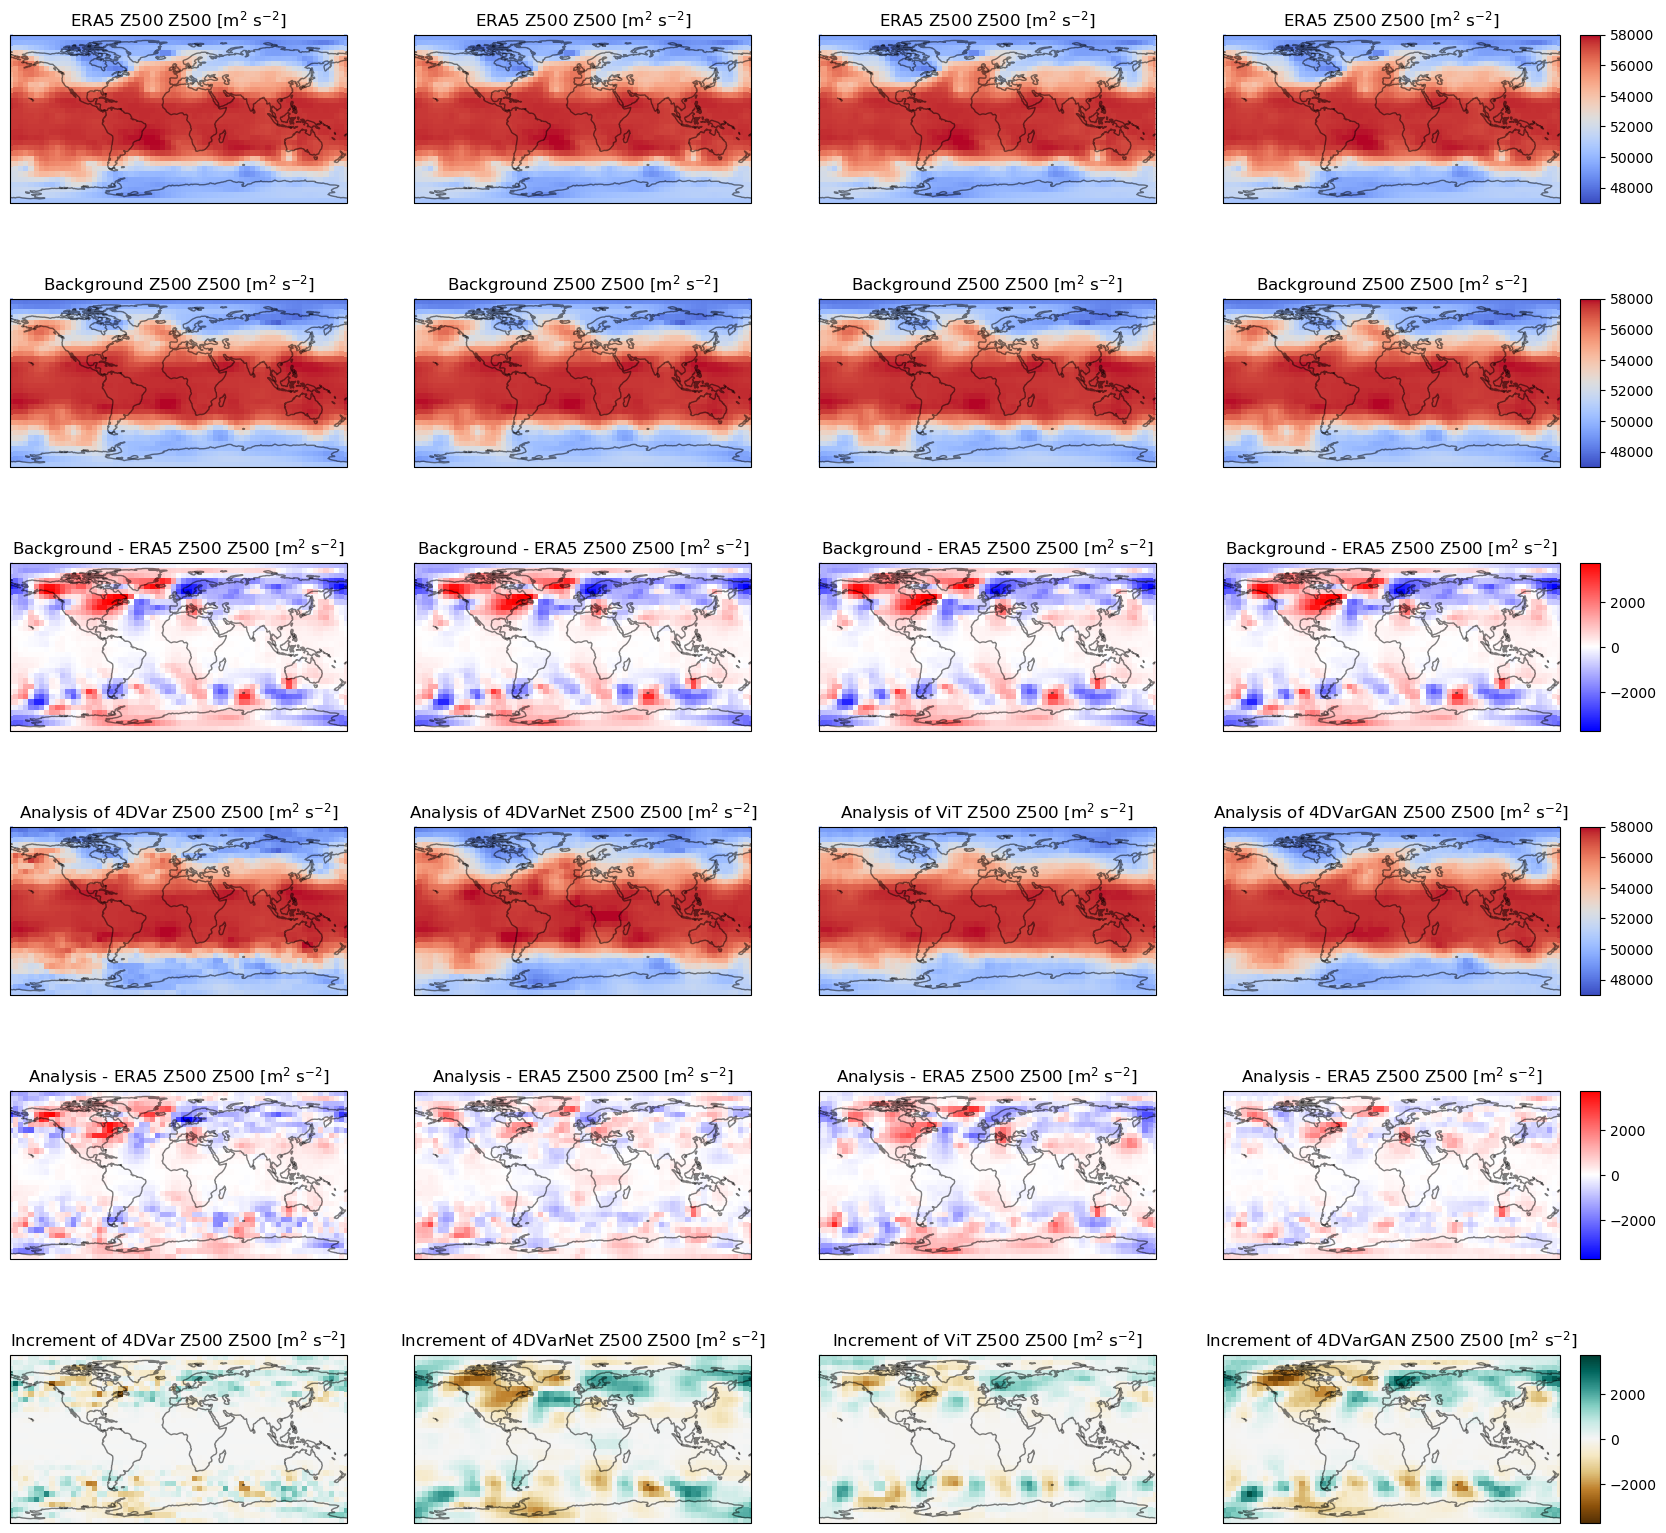

In [44]:
fig, axs = plt.subplots(6, 4, figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})
error_a_max = 0
for i, method in enumerate(["4DVar Obs20", "4DVarNet Obs20", "ViT Obs20", "4DVarGAN Obs20"]):
    error_a = fc_iter[method].isel(time=0).sel(lead_time=0) - fc_iter['ERA5'].sel(time=fc_iter[method].isel(time=0).time)
    if np.max(np.abs(error_a.values)) > np.max(np.abs(error_a_max)):
        error_a_max = error_a
for i, method in enumerate(["4DVar Obs20", "4DVarNet Obs20", "ViT Obs20", "4DVarGAN Obs20"]):
    for iax, var, cmap, r, t in zip(
        [i], ['z'], [cmap_z], [[47000, 58000]], [r'Z500 [m$^2$ s$^{-2}$]']):
        if iax == 3:
            colorbar = True
        else:
            colorbar = False
        imcol(axs[0,iax],
                fig,
                fc_iter['ERA5'].sel(time=fc_iter[method].isel(time=0).time), 
                colorbar=colorbar, cmap=cmap,
                vmin=r[0], vmax=r[1], title=f'ERA5 Z500 {t}')
        imcol(axs[1,iax],
                fig,
                fc_iter['Background'].sel(time=fc_iter[method].isel(time=0).time).sel(init_time=-72), 
                colorbar=colorbar, cmap=cmap,
                vmin=r[0], vmax=r[1], title=f'Background Z500 {t}')
        error_b = fc_iter['Background'].sel(time=fc_iter[method].isel(time=0).time).sel(init_time=-72) - fc_iter['ERA5'].sel(time=fc_iter[method].isel(time=0).time)
        mx = np.abs(error_a_max.max().values)
        vmin_err = -mx
        vmax_err = mx
        imcol(axs[2,iax],
                fig,
                error_b, 
                colorbar=colorbar, cmap=cmap_error,
                vmin=vmin_err, vmax=vmax_err, title=f'Background - ERA5 Z500 {t}')
        imcol(axs[3,iax],
                fig,
                fc_iter[method].isel(time=0).sel(lead_time=0), 
                colorbar=colorbar, cmap=cmap,
                vmin=r[0], vmax=r[1], title=f'Analysis of {method.split(" ")[0]} Z500 {t}')
        error_a = fc_iter[method].isel(time=0).sel(lead_time=0) - fc_iter['ERA5'].sel(time=fc_iter[method].isel(time=0).time)
        mx = np.abs(error_a_max.max().values)
        vmin_err = -mx
        vmax_err = mx
        imcol(axs[4,iax],
                fig,
                error_a, 
                colorbar=colorbar, cmap=cmap_error,
                vmin=vmin_err, vmax=vmax_err, title=f'Analysis - ERA5 Z500 {t}')
        inc_a = fc_iter[method].isel(time=0).sel(lead_time=0) - fc_iter['Background'].sel(time=fc_iter[method].isel(time=0).time).sel(init_time=-72)
        mx = np.abs(error_a_max.max().values)
        vmin_err = -mx
        vmax_err = mx
        imcol(axs[5,iax],
                fig,
                inc_a, 
                colorbar=colorbar, cmap=cmap_diff,
                vmin=vmin_err, vmax=vmax_err, title=f'Increment of {method.split(" ")[0]} Z500 {t}')
plt.tight_layout()
plt.savefig(f"increment_{NAME_TO_VAR[f'{VARIABLE}_{LEVEL}']}{LEVEL}.png",dpi=300, bbox_inches="tight")
plt.savefig(f"increment_{NAME_TO_VAR[f'{VARIABLE}_{LEVEL}']}{LEVEL}.pdf",dpi=300, bbox_inches="tight")

In [30]:
time_4dvar_obs20 = np.load(f"{DALOOP_DIR}/obs_partial_0.2/da_time_4dvar_obspartial0.2.npy")
time_4dvarnet_obs20 = np.load(f"{DALOOP_DIR}/obs_partial_0.2/da_time_4dvarnet_obspartial0.2.npy")
time_vit_obs20 = np.load(f"{DALOOP_DIR}/obs_partial_0.2/da_time_vit_obspartial0.2.npy")
time_4dvarcyclegan_obs20 = np.load(f"{DALOOP_DIR}/obs_partial_0.2/da_time_4dvarcyclegan_wscale_obspartial0.2.npy")

In [32]:
print(np.mean(time_4dvar_obs20 / time_vit_obs20))

391.39768263668856


In [33]:
print(np.mean(time_4dvar_obs20 / time_4dvarnet_obs20))

6.5406092372457225


In [34]:
print(np.mean(time_4dvar_obs20 / time_4dvarcyclegan_obs20))

73.4784885650689
